In [24]:
import sys
sys.path.append("..")

import data_frame
import models
import importlib
import evaluator as ev

In [25]:
filePath = "../../KiDS-DR5-WCScut_x_DESI-DR1-small.fits"
df = data_frame.DataFrame(filePath, "QSO", data_frame.MaxFiller())

In [21]:
# df.data.loc[df.data["faint"], "MAG_GAAP_r"].min()

In [42]:
importlib.reload(models)
model = models.MLModelContext(strategy=models.ANNSingleGauss(df))
model.train()
model.test_predict()

/home/kdrabicki/anaconda3/envs/test_env/lib/python3.12/site-packages/tf_keras/src/saving/serialization_lib.py:159: UserWarning: The object being serialized includes a `lambda`. This is unsafe. In order to reload the object, you will have to pass `safe_mode=False` to the loading function. Please avoid using `lambda` in the future, and use named Python functions instead. This is the `lambda` being serialized:                                      tfp.layers.DistributionLambda(lambda t: tfd.Normal(loc=t[..., :1],
                                                                                        scale=1e-3 + tf.math.softplus(0.05 * t[...,1:]))),

  config_arr = [serialize_keras_object(x) for x in obj]


Epoch 67: early stopping
Restoring model weights from the end of the best epoch: 37.


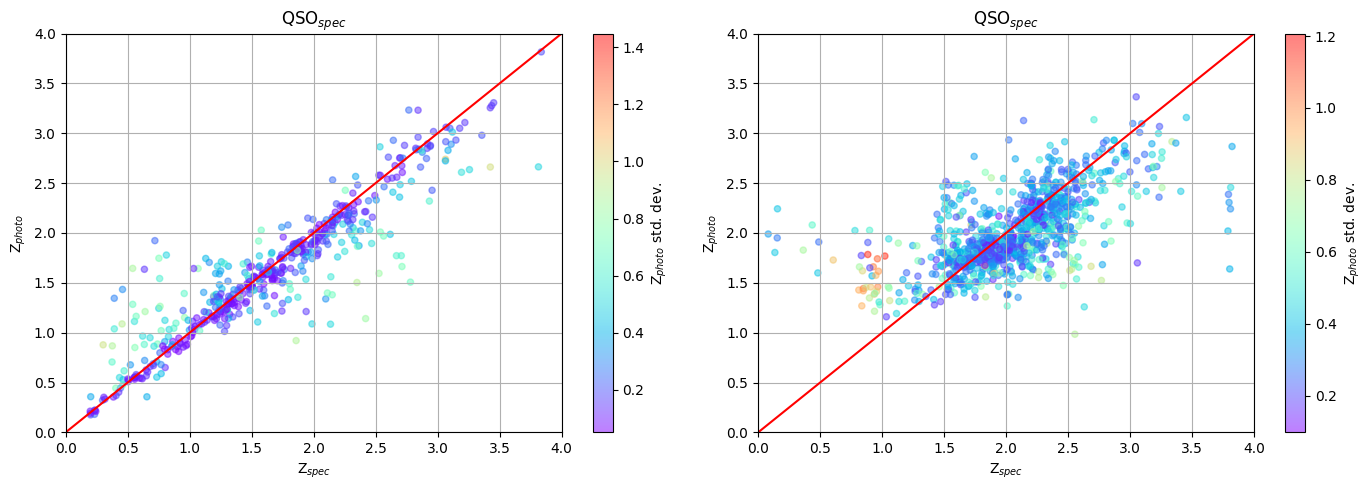

,MSE,R^2,Redshift error
test,0.097206,0.826554,"(-0.00016542661313534817, 0.1328214835276623)"
faint,0.221011,0.352564,"(-0.001450106840122583, 0.17004252872704495)"


In [43]:
importlib.reload(ev)
importlib.reload(models)

evaluator = ev.Evaluator(df)
evaluator.redshift_std()
evaluator.evaluate_metrics()

In [24]:
df.data[df.data["split"] == "test"].to_csv("../../single_gaussian_output")

In [16]:
import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np
tfd = tfp.distributions

In [23]:
normal = tfd.Normal(loc=1, scale=1)
samples = normal.sample(10000).numpy()
lower = np.percentile(samples, 16, axis=0)
upper = np.percentile(samples, 84, axis=0)
std = (upper - lower) / 2
np.median(samples), samples.std(), std

(np.float32(0.9878669), np.float32(0.9957324), np.float32(0.9938885))